In [1]:
from pykat import finesse
import matplotlib.pyplot as plt
%matplotlib inline

--------------------------------------------------------------
Running kat - Started at 2017-05-26 15:43:15.568902


100% | ETA:  0:00:00 | Calculating                                             


Finished in 0.278179 seconds

------------------------------------------------------------------------
                     FINESSE pre-2.1.0    (build pre-2.1.0-225-g61a5d92)
       o_.-=.        Frequency domain INterferomEter Simulation SoftwarE
      (\'".\|        23.04.2016         http://www.gwoptics.org/finesse/
      .>' (_--.      
   _=/d   ,^\        Input file C:\Users\Xu\AppData\Local\Temp\tmppnhmh5gq.kat,
  ~~ \)-'   '        Output file C:\Users\Xu\AppData\Local\Temp\tmppnhmh5gq.out,
     / |             Gnuplot file C:\Users\Xu\AppData\Local\Temp\tmppnhmh5gq.gnu 
    '  '                                        Fri May 26 15:43:15 2017
------------------------------------------------------------------------
 --- cavity tracing
 cavity cavity1:
  cavity is stable! Eigenvalues:
  q=-0.6+0.489898j, w0=407.332148623855um z=-600mm m=-0.92
  finesse : 29.79, round-trip power loss: 0.19 [/100]
  opt. length: 2.4m, FSR: 124.913524166667MHz
  FWHM: 4.19314230128904MHz (pole: 2.

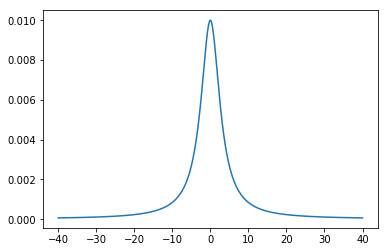

In [12]:
kat = finesse.kat()
kat.parseCommands('''
l i1 1 0 n1
s s0 1 n1 n3

m m1 0.9 0.0001 0 n3 n4
s s_cav 1.2 n4 n5
m m2 0.9 0.1 0 n5 n6
attr m1 Rc -1
attr m2 Rc 1

cav cavity1 m1 n4 m2 n5
maxtem 3
pd pow n4

xaxis m2 phi lin -40 40 2000
%xaxis i1 f lin -10M 10M 200
trace 2
''')
out = kat.run()
plt.plot(out.x, out['pow'])
print(out.stdout)